In [510]:
'''Import Libraries'''
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
from math import exp
from sklearn.model_selection import train_test_split
%matplotlib inline

In [511]:
''' Load data '''
train_csv = pd.read_csv('train.csv')
test_csv = pd.read_csv('test.csv')

In [512]:
train_csv.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


''' Normalize independent variables '''
''' Target variable: price '''
mu = train_csv.price.mean()
std = train_csv.price.std()
print('mu: ', mu, 'std: ', std)

n, bins, patches = plt.hist(train_csv.price, 50, density=1, color='blue')
y = scipy.stats.norm.pdf(bins, mu, std)
plt.plot(bins, y, 'r-')
plt.show()


''' Normalize the target variable '''
log_price = np.log1p(train_csv.price)
log_mu = np.mean(log_price)
log_std = np.std(log_price)
print('mu: ', log_mu, 'std: ', log_std)

n, bins, patches = plt.hist(log_price, 50, density = 1, color = 'blue')
y = scipy.stats.norm.pdf(bins, log_mu, log_std)
plt.plot(bins, y, 'r-')
plt.show()

'''Replace target variable'''
train_csv.price = log_price

In [513]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
id               15035 non-null int64
date             15035 non-null object
price            15035 non-null float64
bedrooms         15035 non-null int64
bathrooms        15035 non-null float64
sqft_living      15035 non-null int64
sqft_lot         15035 non-null int64
floors           15035 non-null float64
waterfront       15035 non-null int64
view             15035 non-null int64
condition        15035 non-null int64
grade            15035 non-null int64
sqft_above       15035 non-null int64
sqft_basement    15035 non-null int64
yr_built         15035 non-null int64
yr_renovated     15035 non-null int64
zipcode          15035 non-null int64
lat              15035 non-null float64
long             15035 non-null float64
sqft_living15    15035 non-null int64
sqft_lot15       15035 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.4+ MB


In [514]:
test_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 20 columns):
id               6468 non-null int64
date             6468 non-null object
bedrooms         6468 non-null int64
bathrooms        6468 non-null float64
sqft_living      6468 non-null int64
sqft_lot         6468 non-null int64
floors           6468 non-null float64
waterfront       6468 non-null int64
view             6468 non-null int64
condition        6468 non-null int64
grade            6468 non-null int64
sqft_above       6468 non-null int64
sqft_basement    6468 non-null int64
yr_built         6468 non-null int64
yr_renovated     6468 non-null int64
zipcode          6468 non-null int64
lat              6468 non-null float64
long             6468 non-null float64
sqft_living15    6468 non-null int64
sqft_lot15       6468 non-null int64
dtypes: float64(4), int64(15), object(1)
memory usage: 1010.7+ KB


In [515]:
''' 
There are no missing values in both train and test set.
There is only one object type data in both train and test set.
'''

' \nThere are no missing values in both train and test set.\nThere is only one object type data in both train and test set.\n'

In [516]:
'''
Combine train and test set
'''

'\nCombine train and test set\n'

In [517]:
all_set_csv = pd.concat([train_csv, test_csv], sort=True)

In [518]:
all_set_csv.head(20)

,bathrooms,bedrooms,condition,date,floors,grade,id,lat,long,price,...,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode
0,1.00,3,3,20141013T000000,1.0,7,0,47.5112,-122.257,221900.0,...,0,1180,1340,5650,5650,0,0,1955,0,98178
1,1.00,2,3,20150225T000000,1.0,6,1,47.7379,-122.233,180000.0,...,0,770,2720,10000,8062,0,0,1933,0,98028
2,2.00,3,3,20150218T000000,1.0,8,2,47.6168,-122.045,510000.0,...,0,1680,1800,8080,7503,0,0,1987,0,98074
3,2.25,3,3,20140627T000000,2.0,7,3,47.3097,-122.327,257500.0,...,0,1715,2238,6819,6819,0,0,1995,0,98003
4,1.50,3,3,20150115T000000,1.0,7,4,47.4095,-122.315,291850.0,...,0,1060,1650,9711,9711,0,0,1963,0,98198
5,2.50,3,3,20150403T000000,1.0,8,5,47.6007,-122.145,662500.0,...,1700,3560,2210,9796,8925,0,0,1965,0,98007
6,1.00,2,4,20140527T000000,1.0,7,6,47.6900,-122.292,468000.0,...,300,1160,1330,6000,6000,0,0,1942,0,98115
7,1.00,3,4,20140528T000000,1.5,7,7,47.7558,-122.229,310000.0,...,0,1430,1780,19901,12697,0,0,1927,0,98028
8,1.75,3,4,20141007T000000,1.0,7,8,47.6127,-122.045,400000.0,...,0,1370,1370,9680,10208,0,0,1977,0,98074
9,2.00,5,3,20150312T000000,1.5,7,9,47.6700,-122.394,530000.0,...,0,1810,1360,4850,4850,0,0,1900,0,98107


In [519]:
all_set_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21503 entries, 0 to 6467
Data columns (total 21 columns):
bathrooms        21503 non-null float64
bedrooms         21503 non-null int64
condition        21503 non-null int64
date             21503 non-null object
floors           21503 non-null float64
grade            21503 non-null int64
id               21503 non-null int64
lat              21503 non-null float64
long             21503 non-null float64
price            15035 non-null float64
sqft_above       21503 non-null int64
sqft_basement    21503 non-null int64
sqft_living      21503 non-null int64
sqft_living15    21503 non-null int64
sqft_lot         21503 non-null int64
sqft_lot15       21503 non-null int64
view             21503 non-null int64
waterfront       21503 non-null int64
yr_built         21503 non-null int64
yr_renovated     21503 non-null int64
zipcode          21503 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.6+ MB


In [520]:
'''
Data
condition, grade, view, bathrooms, bedrooms, floors, sqft_above, sqft_basement, sqft_living, sqft_living15, 
sqft_lot, sqft_living15, waterfront, zipcode, lat, long, yr_built, yr_renovated, date (object)

'''

'\nData\ncondition, grade, view, bathrooms, bedrooms, floors, sqft_above, sqft_basement, sqft_living, sqft_living15, \nsqft_lot, sqft_living15, waterfront, zipcode, lat, long, yr_built, yr_renovated, date (object)\n\n'

In [521]:
'''
Change object type data to numerical
'''

'\nChange object type data to numerical\n'

In [522]:
all_set_csv['date'] = all_set_csv['date'].str.slice(0,6).astype('int')

In [523]:
all_set_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21503 entries, 0 to 6467
Data columns (total 21 columns):
bathrooms        21503 non-null float64
bedrooms         21503 non-null int64
condition        21503 non-null int64
date             21503 non-null int32
floors           21503 non-null float64
grade            21503 non-null int64
id               21503 non-null int64
lat              21503 non-null float64
long             21503 non-null float64
price            15035 non-null float64
sqft_above       21503 non-null int64
sqft_basement    21503 non-null int64
sqft_living      21503 non-null int64
sqft_living15    21503 non-null int64
sqft_lot         21503 non-null int64
sqft_lot15       21503 non-null int64
view             21503 non-null int64
waterfront       21503 non-null int64
yr_built         21503 non-null int64
yr_renovated     21503 non-null int64
zipcode          21503 non-null int64
dtypes: float64(5), int32(1), int64(15)
memory usage: 3.5 MB


In [524]:
'''
Features to be added
date -> year,month
floors -> floors, with_loft
sqft_basement -> with_basement
yr_renovated -> renovated
sqft_living15 + sqft_living -> living_greater 
sqft_lot15 + sqft_lot -> lot_greater
'''

'\nFeatures to be added\ndate -> year,month\nfloors -> floors, with_loft\nsqft_basement -> with_basement\nyr_renovated -> renovated\nsqft_living15 + sqft_living -> living_greater \nsqft_lot15 + sqft_lot -> lot_greater\n'

In [525]:
'''date -> year, month '''
all_set_csv['year'] = all_set_csv['date'].astype(str).str.slice(0,4).astype(int)
all_set_csv['month'] = all_set_csv['date'].astype(str).str.slice(4,6).astype(int)


In [526]:
''' group month to season '''
conditions = [((all_set_csv['month']==12) | (all_set_csv['month']==1) | (all_set_csv['month']==2)),
              ((all_set_csv['month']==3) | (all_set_csv['month']==4) | (all_set_csv['month']==5)),
              ((all_set_csv['month']==6) | (all_set_csv['month']==7) | (all_set_csv['month']==8))]
choices = ['winter','spring','summer']
all_set_csv['season'] = np.select(conditions, choices, default = 'fall')
all_set_csv.drop('month',axis=1, inplace=True)

In [527]:
''' season to dummies '''
all_set_csv = pd.concat([all_set_csv.drop('season',axis=1), pd.get_dummies(all_set_csv['season']).astype(int)], axis=1)

# avoid dummy variable trap
all_set_csv.drop('fall', axis=1, inplace=True)


In [528]:
''' floors -> floors, with_loft'''
all_set_csv['with_loft'] = np.select([all_set_csv['floors'].astype(str).str.slice(2,3) == '5'],[1],default=0)
all_set_csv['floors'] = all_set_csv['floors'].astype(str).str.slice(0,1).astype(int)

print(all_set_csv.with_loft.value_counts() ,'\n', all_set_csv.floors.value_counts())


0    19439
1     2064
Name: with_loft, dtype: int64 
 1    12507
2     8377
3      619
Name: floors, dtype: int64


In [529]:
'''sqft_basement -> with_basement '''
all_set_csv['with_basement'] = np.select([all_set_csv['sqft_basement'] > 0], [1], default=0)
all_set_csv.with_basement.value_counts()


0    13056
1     8447
Name: with_basement, dtype: int64

In [530]:
'''yr_renovated -> renovated '''
all_set_csv['renovated'] = np.select([all_set_csv['yr_renovated'] > 0], [1], default = 0)
all_set_csv.renovated.value_counts()


0    20590
1      913
Name: renovated, dtype: int64

In [531]:
''' sqft_living15 + sqft_living -> living_greater '''
all_set_csv['living_greater'] = np.select([all_set_csv['sqft_living'] > all_set_csv['sqft_living15']], [1], default=0)
all_set_csv.living_greater.value_counts()


0    11700
1     9803
Name: living_greater, dtype: int64

In [532]:
''' sqft_lot15 + sqft_lot -> lot_greater '''
all_set_csv['lot_greater'] = np.select([all_set_csv['sqft_lot'] > all_set_csv['sqft_lot15']], [1], default=0)
all_set_csv.lot_greater.value_counts()


0    12953
1     8550
Name: lot_greater, dtype: int64

''' add per_sqft_living_price '''
all_set_csv['per_sqft_living_price']=np.expm1(all_set_csv[all_set_csv['price']>0]['price'])/all_set_csv[all_set_csv['price']>0]['sqft_living']
all_set_csv.drop('sqft_living', axis=1, inplace=True)

In [533]:
''' per_sqft_living_price without normalizing target variable '''
all_set_csv['per_sqft_living_price']=all_set_csv[all_set_csv['price']>0]['price']/all_set_csv[all_set_csv['price']>0]['sqft_living']
all_set_csv.drop('sqft_living', axis=1, inplace=True)

''' add per_sqft_lot_price '''
all_set_csv['per_sqft_lot_price'] = np.expm1(all_set_csv[all_set_csv['price']>0]['price'])/all_set_csv[all_set_csv['price']>0]['sqft_lot']
all_set_csv.drop('sqft_lot', axis=1, inplace=True)

In [534]:
''' per_sqft_lot_price without normalizing target variable '''
all_set_csv['per_sqft_lot_price'] = all_set_csv[all_set_csv['price']>0]['price']/all_set_csv[all_set_csv['price']>0]['sqft_lot']
all_set_csv.drop('sqft_lot', axis=1, inplace=True)

In [535]:
''' add purchased_in_2014 '''
all_set_csv['purchased_in_2014'] = np.select([all_set_csv['year'] == 2014], [1], default = 0)
all_set_csv.drop('year', axis=1, inplace=True)

In [536]:
all_set_csv.head()

,bathrooms,bedrooms,condition,date,floors,grade,id,lat,long,price,...,summer,winter,with_loft,with_basement,renovated,living_greater,lot_greater,per_sqft_living_price,per_sqft_lot_price,purchased_in_2014
0,1.00,3,3,201410,1,7,0,47.5112,-122.257,221900.0,...,0,0,0,0,0,0,0,188.050847,39.274336,1
1,1.00,2,3,201502,1,6,1,47.7379,-122.233,180000.0,...,0,1,0,0,0,0,1,233.766234,18.000000,0
2,2.00,3,3,201502,1,8,2,47.6168,-122.045,510000.0,...,0,1,0,0,0,0,1,303.571429,63.118812,0
3,2.25,3,3,201406,2,7,3,47.3097,-122.327,257500.0,...,1,0,0,0,0,0,0,150.145773,37.762135,1
4,1.50,3,3,201501,1,7,4,47.4095,-122.315,291850.0,...,0,1,0,0,0,0,0,275.330189,30.053548,0


In [537]:
'''
Featues to be dropped
date, sqft_basement, sqft_above (because sqft_living = sqft_basement + sqft_above)
sqft_living15, sqft_lot15, yr_renovated
'''

'\nFeatues to be dropped\ndate, sqft_basement, sqft_above (because sqft_living = sqft_basement + sqft_above)\nsqft_living15, sqft_lot15, yr_renovated\n'

In [538]:
all_set_csv.drop(['date','sqft_basement','sqft_above','sqft_living15','sqft_lot15','yr_renovated'], axis=1, inplace=True)

In [539]:
all_set_csv.head()

,bathrooms,bedrooms,condition,floors,grade,id,lat,long,price,view,...,summer,winter,with_loft,with_basement,renovated,living_greater,lot_greater,per_sqft_living_price,per_sqft_lot_price,purchased_in_2014
0,1.00,3,3,1,7,0,47.5112,-122.257,221900.0,0,...,0,0,0,0,0,0,0,188.050847,39.274336,1
1,1.00,2,3,1,6,1,47.7379,-122.233,180000.0,0,...,0,1,0,0,0,0,1,233.766234,18.000000,0
2,2.00,3,3,1,8,2,47.6168,-122.045,510000.0,0,...,0,1,0,0,0,0,1,303.571429,63.118812,0
3,2.25,3,3,2,7,3,47.3097,-122.327,257500.0,0,...,1,0,0,0,0,0,0,150.145773,37.762135,1
4,1.50,3,3,1,7,4,47.4095,-122.315,291850.0,0,...,0,1,0,0,0,0,0,275.330189,30.053548,0


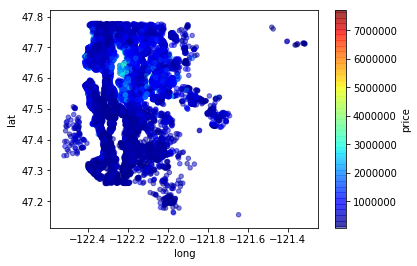

In [540]:
all_set_csv[all_set_csv['price']>0].plot(kind='scatter', x='long', y='lat', alpha=0.5, 
                 c='price', cmap=plt.get_cmap('jet'), colorbar=True, sharex=False)

In [541]:
x_cluster = all_set_csv[all_set_csv['price']>0].iloc[:,5:9].values

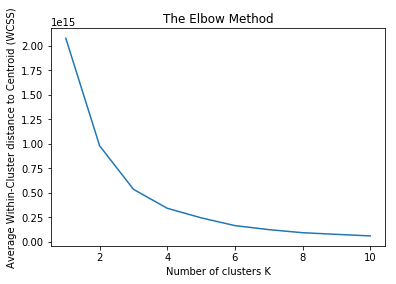

In [542]:
from sklearn.cluster import KMeans
dist = []
for i in range(1, 11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state= 0)
    kmeans.fit(x_cluster[:,1:4])
    dist.append(kmeans.inertia_)
plt.plot(range(1, 11),dist)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters K')
plt.ylabel('Average Within-Cluster distance to Centroid (WCSS)')  
plt.show()


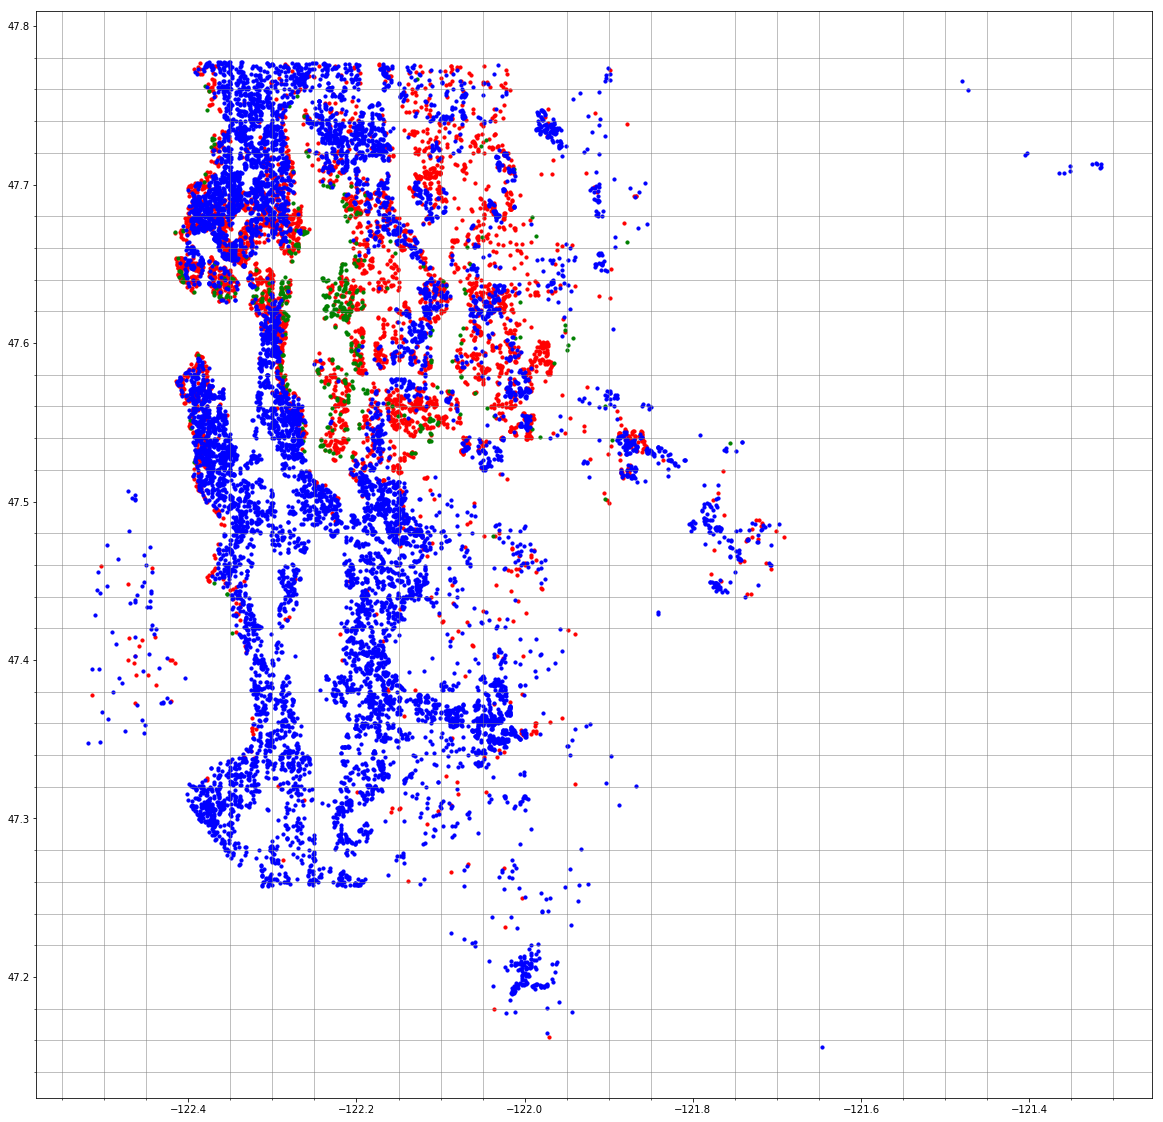

In [543]:
kmeans=KMeans(n_clusters=3, init='k-means++',random_state= 0)
y_kmeans=kmeans.fit_predict(x_cluster[:,1:4])

# Visualizing the clusters
fig, ax = plt.subplots(figsize=(20,20))
#ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(True)
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle='-', linewidth='0.5', color= 'grey')
plt.scatter(x_cluster[y_kmeans == 0, 2], x_cluster[y_kmeans == 0, 1], s = 10, c = 'red')
plt.scatter(x_cluster[y_kmeans == 1, 2], x_cluster[y_kmeans == 1, 1], s = 10, c = 'green')
plt.scatter(x_cluster[y_kmeans == 2, 2], x_cluster[y_kmeans == 2, 1], s = 10, c = 'blue')
plt.grid()
plt.show()

In [544]:
all_set_csv.loc[x_cluster[y_kmeans==0][:,0],'red'] = 1
all_set_csv.loc[x_cluster[y_kmeans==1][:,0], 'green'] = 1
all_set_csv.red = np.nan_to_num(all_set_csv.red)
all_set_csv.green = np.nan_to_num(all_set_csv.green)

all_set_csv.head()

,bathrooms,bedrooms,condition,floors,grade,id,lat,long,price,view,...,with_loft,with_basement,renovated,living_greater,lot_greater,per_sqft_living_price,per_sqft_lot_price,purchased_in_2014,red,green
0,1.00,3,3,1,7,0,47.5112,-122.257,221900.0,0,...,0,0,0,0,0,188.050847,39.274336,1,0.0,0.0
1,1.00,2,3,1,6,1,47.7379,-122.233,180000.0,0,...,0,0,0,0,1,233.766234,18.000000,0,0.0,0.0
2,2.00,3,3,1,8,2,47.6168,-122.045,510000.0,0,...,0,0,0,0,1,303.571429,63.118812,0,0.0,0.0
3,2.25,3,3,2,7,3,47.3097,-122.327,257500.0,0,...,0,0,0,0,0,150.145773,37.762135,1,0.0,0.0
4,1.50,3,3,1,7,4,47.4095,-122.315,291850.0,0,...,0,0,0,0,0,275.330189,30.053548,0,0.0,0.0


In [545]:
all_set_csv['scf'] = all_set_csv.zipcode.astype(str).str.slice(0,3).astype(int)

In [546]:
all_set_csv.drop(['lat','long','zipcode'], axis=1, inplace=True)

In [547]:
all_set_csv.head()

,bathrooms,bedrooms,condition,floors,grade,id,price,view,waterfront,yr_built,...,with_basement,renovated,living_greater,lot_greater,per_sqft_living_price,per_sqft_lot_price,purchased_in_2014,red,green,scf
0,1.00,3,3,1,7,0,221900.0,0,0,1955,...,0,0,0,0,188.050847,39.274336,1,0.0,0.0,981
1,1.00,2,3,1,6,1,180000.0,0,0,1933,...,0,0,0,1,233.766234,18.000000,0,0.0,0.0,980
2,2.00,3,3,1,8,2,510000.0,0,0,1987,...,0,0,0,1,303.571429,63.118812,0,0.0,0.0,980
3,2.25,3,3,2,7,3,257500.0,0,0,1995,...,0,0,0,0,150.145773,37.762135,1,0.0,0.0,980
4,1.50,3,3,1,7,4,291850.0,0,0,1963,...,0,0,0,0,275.330189,30.053548,0,0.0,0.0,981


In [548]:
all_set_csv.dtypes

bathrooms                float64
bedrooms                   int64
condition                  int64
floors                     int32
grade                      int64
id                         int64
price                    float64
view                       int64
waterfront                 int64
yr_built                   int64
spring                     int32
summer                     int32
winter                     int32
with_loft                  int32
with_basement              int32
renovated                  int32
living_greater             int32
lot_greater                int32
per_sqft_living_price    float64
per_sqft_lot_price       float64
purchased_in_2014          int32
red                      float64
green                    float64
scf                        int32
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000251DACFCC18>,
      dtype=object)

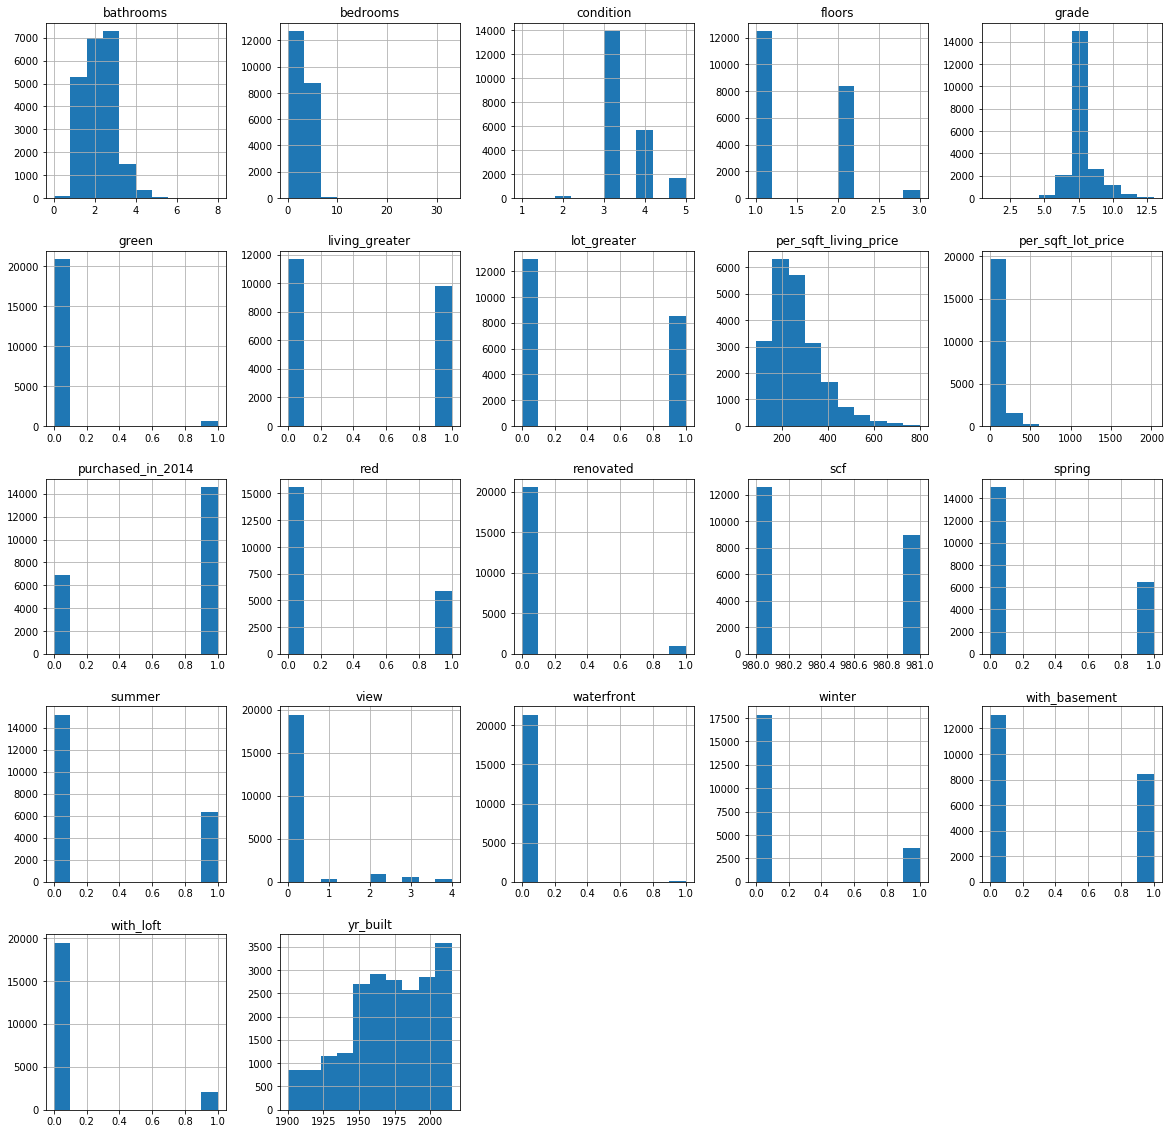

In [549]:
all_set_csv.drop(['id','price'],axis=1).hist(figsize = (20,20))

In [550]:
''' drop columns with low correlation (-0.1 ~ 0.1 )'''
corr = all_set_csv[all_set_csv['price']>0].drop('id',axis=1).corr(method='pearson').price.sort_values(ascending=False)
corr_df = pd.DataFrame({'corr': corr})
corr_df

,corr
price,1.000000
green,0.685111
grade,0.667211
per_sqft_living_price,0.554405
bathrooms,0.525479
red,0.449409
view,0.400806
bedrooms,0.323672
per_sqft_lot_price,0.302995
waterfront,0.265738


In [551]:
low_corr = corr_df[abs(corr_df['corr'])<=0.1].index
low_corr

Index(['lot_greater', 'with_loft', 'yr_built', 'condition', 'spring', 'summer',
       'purchased_in_2014', 'scf', 'winter'],
      dtype='object')

In [552]:
all_set_csv.drop(low_corr, axis=1, inplace=True)

In [553]:
all_set_csv[all_set_csv['red'] == 1].describe()

,bathrooms,bedrooms,floors,grade,id,price,view,waterfront,with_basement,renovated,living_greater,per_sqft_living_price,per_sqft_lot_price,red,green
count,5884.000000,5884.000000,5884.000000,5884.000000,5884.000000,4.117000e+03,5884.000000,5884.000000,5884.000000,5884.000000,5884.000000,5884.000000,5884.000000,5884.0,5884.0
mean,2.396881,3.632903,1.560673,8.273453,10766.929980,8.125742e+05,0.392760,0.010367,0.452583,0.059993,0.553875,318.640861,116.543455,1.0,0.0
std,0.743891,0.985279,0.550268,1.180974,6201.244187,1.946237e+05,0.963143,0.101298,0.497789,0.237494,0.497131,102.193562,102.568661,0.0,0.0
min,0.000000,0.000000,1.000000,3.000000,5.000000,5.940000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,106.951872,0.423893,1.0,0.0
25%,2.000000,3.000000,1.000000,7.000000,5290.750000,6.625000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,247.813411,58.726317,1.0,0.0
50%,2.500000,4.000000,2.000000,8.000000,10886.000000,7.550000e+05,0.000000,0.000000,0.000000,0.000000,1.000000,293.457277,94.625284,1.0,0.0
75%,2.750000,4.000000,2.000000,9.000000,16116.500000,9.000000e+05,0.000000,0.000000,1.000000,0.000000,1.000000,368.652274,151.170276,1.0,0.0
max,6.750000,33.000000,3.000000,13.000000,21502.000000,1.438890e+06,4.000000,1.000000,1.000000,1.000000,1.000000,778.443114,2027.208539,1.0,0.0


In [554]:
all_set_csv[all_set_csv['green'] == 1].describe()

,bathrooms,bedrooms,floors,grade,id,price,view,waterfront,with_basement,renovated,living_greater,per_sqft_living_price,per_sqft_lot_price,red,green
count,568.000000,568.000000,568.000000,568.000000,568.000000,4.060000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.0,568.0
mean,3.089349,3.989437,1.707746,9.558099,10768.977113,2.068524e+06,1.193662,0.095070,0.556338,0.126761,0.690141,490.735178,172.997738,0.0,1.0
std,1.062241,0.975843,0.546733,1.650227,6082.373780,7.715590e+05,1.558216,0.293571,0.497254,0.332998,0.462843,127.835864,110.229768,0.0,0.0
min,1.000000,1.000000,1.000000,5.000000,16.000000,1.442500e+06,0.000000,0.000000,0.000000,0.000000,0.000000,168.389956,1.836547,0.0,1.0
25%,2.500000,3.000000,1.000000,8.000000,5312.000000,1.600000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,395.061728,94.994088,0.0,1.0
50%,3.250000,4.000000,2.000000,10.000000,10650.500000,1.810000e+06,0.000000,0.000000,1.000000,0.000000,1.000000,472.424083,156.677608,0.0,1.0
75%,3.750000,5.000000,2.000000,11.000000,15844.750000,2.250000e+06,3.000000,0.000000,1.000000,0.000000,1.000000,581.268377,231.068373,0.0,1.0
max,8.000000,8.000000,3.000000,13.000000,21462.000000,7.700000e+06,4.000000,1.000000,1.000000,1.000000,1.000000,800.000000,677.631579,0.0,1.0


In [555]:
all_set_csv[(all_set_csv['red'] == 0) & (all_set_csv['green'] == 0)].describe()

,bathrooms,bedrooms,floors,grade,id,price,view,waterfront,with_basement,renovated,living_greater,per_sqft_living_price,per_sqft_lot_price,red,green
count,15051.000000,15051.000000,15051.000000,15051.000000,15051.000000,10512.000000,15051.000000,15051.000000,15051.000000,15051.000000,15051.000000,15051.000000,15051.000000,15051.0,15051.0
mean,1.969520,3.246362,1.392931,7.347352,10744.093947,375187.854547,0.136602,0.003189,0.363298,0.032423,0.408744,233.670354,70.101255,0.0,0.0
std,0.707275,0.873854,0.543412,0.970531,6215.042550,114649.963512,0.575418,0.056384,0.480966,0.177127,0.491618,92.537587,78.388211,0.0,0.0
min,0.000000,0.000000,1.000000,1.000000,0.000000,78000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,87.588235,0.505019,0.0,0.0
25%,1.500000,3.000000,1.000000,7.000000,5404.000000,284000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,165.763294,29.930609,0.0,0.0
50%,2.000000,3.000000,1.000000,7.000000,10708.000000,370000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,212.804878,46.259088,0.0,0.0
75%,2.500000,4.000000,2.000000,8.000000,16145.500000,465000.000000,0.000000,0.000000,1.000000,0.000000,1.000000,281.954887,77.860850,0.0,0.0
max,7.500000,11.000000,3.000000,13.000000,21501.000000,593700.000000,4.000000,1.000000,1.000000,1.000000,1.000000,792.682927,826.086957,0.0,0.0


In [556]:
all_set_csv[all_set_csv['price']>0].drop('id',axis=1).corr(method='pearson').price.sort_values(ascending=False)

price                    1.000000
green                    0.685111
grade                    0.667211
per_sqft_living_price    0.554405
bathrooms                0.525479
red                      0.449409
view                     0.400806
bedrooms                 0.323672
per_sqft_lot_price       0.302995
waterfront               0.265738
floors                   0.243731
living_greater           0.227226
with_basement            0.176706
renovated                0.140550
Name: price, dtype: float64

In [557]:

# Train set and Test set
train_set = all_set_csv.iloc[:len(train_csv),:]
test_set = all_set_csv.iloc[len(train_csv):, :]

print("Train set:", train_set.shape, "\n Test set:", test_set.shape)

Train set: (15035, 15) 
 Test set: (6468, 15)


In [558]:
''' Divide into train and test set '''
y_train = train_set.price.copy()
test_id = test_set.id
x_train = train_set.drop(['id', 'price'], axis=1).copy()
x_test = test_set.drop(['id','price'], axis=1).copy()

''' Feature Scaling '''
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc_x = StandardScaler() # PCA, clustering, logistic regression, SVMs, perceptrons, neural networks
#sc_x = MinMaxScaler()
x_train_df = pd.DataFrame(sc_x.fit_transform(x_train), columns=x_train.columns)
x_test_df = pd.DataFrame(sc_x.transform(x_test), columns=x_test.columns)


In [559]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()

vif['VIF_Factor'] = [variance_inflation_factor(
                x_train_df.values, i) for i in range(x_train_df.shape[1])]
vif['features'] = x_train_df.columns

'''
vif['VIF_Factor'] = [variance_inflation_factor(
                x_train_df.drop(['zipcode'],axis=1).values, i) for i in range(x_train_df.drop(['zipcode'], axis=1).shape[1])]
vif['features'] = x_train_df.drop(['zipcode'],axis=1).columns

vif['VIF_Factor'] = [variance_inflation_factor(
                x_train.drop(['zipcode','year'],axis=1).values, i) for i in range(x_train.drop(['zipcode','year'], axis=1).shape[1])]
vif['features'] = x_train.drop(['zipcode','year'],axis=1).columns

vif['VIF_Factor'] = [variance_inflation_factor(
                x_train.drop(['zipcode','year','long'],axis=1).values, i) for i in range(x_train.drop(['zipcode','year','long'], axis=1).shape[1])]
vif['features'] = x_train.drop(['zipcode','year','long'],axis=1).columns

vif['VIF_Factor'] = [variance_inflation_factor(
                x_train.drop(['zipcode','year','long','lat'],axis=1).values, i) for i in range(x_train.drop(['zipcode','year','long','lat'], axis=1).shape[1])]
vif['features'] = x_train.drop(['zipcode','year','long','lat'],axis=1).columns
'''
print(vif.round(1).sort_values(by='VIF_Factor', ascending=False))


    VIF_Factor               features
11         3.8                    red
0          2.8              bathrooms
9          2.7  per_sqft_living_price
3          2.6                  grade
2          2.5                 floors
10         2.1     per_sqft_lot_price
12         2.0                  green
1          1.6               bedrooms
6          1.5          with_basement
4          1.3                   view
8          1.3         living_greater
5          1.2             waterfront
7          1.0              renovated


In [560]:
# Split train and test set from train
x_train_set, x_test_set, y_train_set, y_test_set = train_test_split(x_train_df, y_train, test_size=0.3, random_state=0)


In [561]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

'''Lasso regressor'''
las_reg = Lasso()
alphas = np.logspace(-4, -0.5, 30)
param = {'alpha':alphas}

grid_search = GridSearchCV(las_reg, param, cv=10)
grid_search.fit(x_train_set, y_train_set)
grid_search.best_estimator_

las_reg = Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
               normalize=False, positive=False, precompute=False, random_state=None,
               selection='cyclic', tol=0.0001, warm_start=False)
las_reg.fit(x_train_set, y_train_set.values)
y_pred = las_reg.predict(x_test_set)
print('score: ', las_reg.score(x_test_set, y_test_set))
print('RMSE: ', sqrt(mean_squared_error(y_test_set, y_pred)))

plt.scatter(y_test_set, y_pred)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

''' prediction on x_test'''
las_reg.fit(x_train_df, y_train)
y_pred = las_reg.predict(x_test_df)

''' prediction on x_test'''
las_reg.fit(x_train_df, y_train)
y_pred = las_reg.predict(x_test_df)

# Knn Regresssor
# find the best number of k
rmse = []
for k in range(1,10):
    knn_regressor = KNeighborsRegressor(n_neighbors = k)
    knn_regressor.fit(x_train_set, y_train_set.values)
    y_pred = knn_regressor.predict(x_test_set)
    error = sqrt(mean_squared_error(y_test_set, y_pred))
    rmse.append(error)
    if k%2 == 1:
        print('at ', k, ' : ', error)
    
graph = pd.DataFrame(rmse)
graph.plot()


knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(x_train_set, y_train_set.values)
y_pred = knn_reg.predict(x_test_set)
print('score: ', knn_reg.score(x_test_set, y_test_set))
print('RMSE: ', sqrt(mean_squared_error(y_test_set, y_pred)))

plt.scatter(y_test_set, y_pred)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

''' prediction on x_test'''
knn_reg.fit(x_train_df, y_train)
y_pred = knn_reg.predict(x_test_df)

''' GridSearch on Knn '''
params = {'n_neighbors':[1,3,5,7,9], 'weights':['uniform', 'distance'],'algorithm':['auto','ball_tree','kd_tree']}
knn_reg = KNeighborsRegressor()
grid_search = GridSearchCV(knn_reg, params, cv = 10)
grid_search.fit(x_train_set, y_train_set)

grid_search.best_estimator_

score:  0.8989192081769297
RMSE:  115249.34463177409


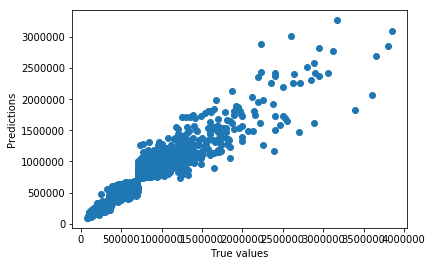

In [562]:
knn_reg = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=7, p=2,
          weights='distance')
knn_reg.fit(x_train_set, y_train_set)
y_pred = knn_reg.predict(x_test_set)

print('score: ', knn_reg.score(x_test_set, y_test_set))
print('RMSE: ', sqrt(mean_squared_error(y_test_set, y_pred)))

plt.scatter(y_test_set, y_pred)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

''' prediction on x_test'''
knn_reg.fit(x_train_df, y_train)
y_pred = knn_reg.predict(x_test_df)

# Random Forest
rd_forest = RandomForestRegressor(n_estimators=100)
rd_forest.fit(x_train_set, y_train_set)
y_pred = rd_forest.predict(x_test_set)
print('score: ',rd_forest.score(x_test_set, y_test_set))
print('RMSE: ', sqrt(mean_squared_error(y_test_set, y_pred)))

plt.scatter(y_test_set, y_pred)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

''' prediction on x_test'''
rd_forest.fit(x_train_df, y_train)
y_pred = rd_forest.predict(x_test_df)

''' GridSearch on Random Forest '''
params = {'n_estimators':[3, 10, 30, 60,100], 'max_depth':[1,5,10,20]}
rd_forest = RandomForestRegressor()
grid_search = GridSearchCV(rd_forest, params, cv = 5)
grid_search.fit(x_train_set, y_train_set)

grid_search.best_estimator_

score:  0.9186217626396105
RMSE:  103408.98757939071


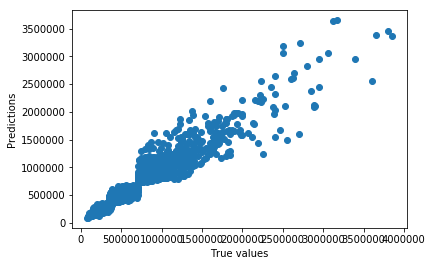

In [563]:
rd_forest = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
rd_forest.fit(x_train_set, y_train_set)
y_pred = rd_forest.predict(x_test_set)
print('score: ',rd_forest.score(x_test_set, y_test_set))
print('RMSE: ', sqrt(mean_squared_error(y_test_set, y_pred)))

plt.scatter(y_test_set, y_pred)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()



In [564]:
''' prediction on x_test'''
rd_forest.fit(x_train_df, y_train)
y_pred = rd_forest.predict(x_test_df)

In [566]:
submission = pd.DataFrame({
                           'id': test_id,
                           'price': y_pred
                           })
submission.to_csv('submission.csv', index=False)